In [43]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [7]:
data=pd.read_csv("iris_df")

In [21]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1


In [27]:
x = data.drop(['target'],axis=1).values
y = data['target'].values   

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "criterion":['gini','entropy','log_loss']
}

In [34]:
tree = DecisionTreeClassifier()

In [37]:
grid_search=GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

In [38]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [39]:
print("Best Parameters:", grid_search.best_params_)
print("Best Precision:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Precision: 0.9666666666666666


In [40]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print(accuracy)

0.9333333333333333


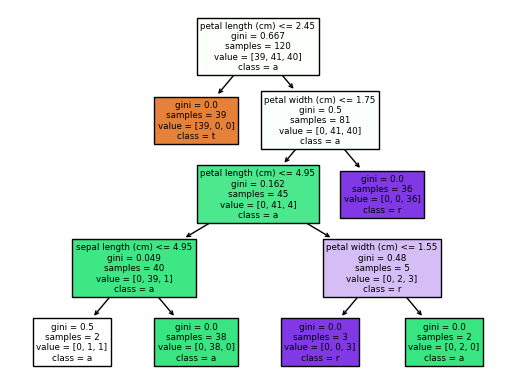

In [45]:
feature_names = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
_=tree.plot_tree(best_model, 
                   feature_names=feature_names,  
                   class_names="target",
                   filled=True)